# Principle Component Analysis(PCA)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [35]:
m=100
A,y = make_classification(n_samples=m, n_features=10, n_classes=3, n_clusters_per_class=1)
n = len(A[0])
# A

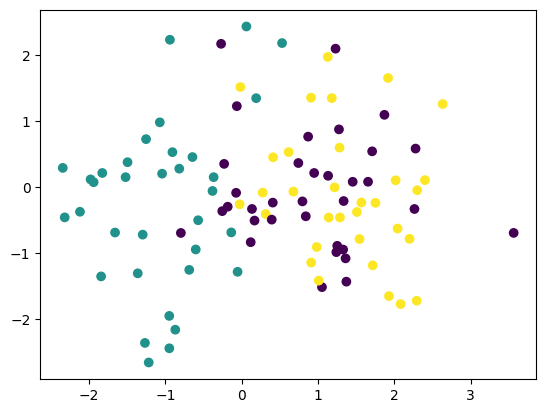

In [36]:
plt.scatter(A[:,0], A[:,1], c=y)
plt.show()

#### step 1. compute covariance matrix

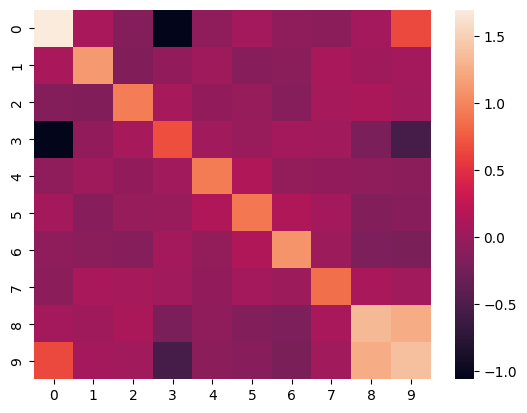

1.6959455944702022

In [37]:
mu = np.empty((m,n))
for i in range(n):
    mu[:,i] =A[:,i] - A[:,i].mean()

# compute covariance matrix by taking dot product
cov = ((np.transpose(mu)).dot(mu))/m

sns.heatmap(cov)
plt.show()

max(np.diagonal(cov))

#### step 2. compute eigen values and eigen vectors of covariance matrix

In [38]:
# since variance is maximum in the largest eigen vector we will first arange vectors in descending order
# compute eigen values and eigen vectors
values, vectors = np.linalg.eig(cov)

# Sort the eigenvalues and eigen vectors in descending order 
idx = values.argsort()[::-1]
values = values[idx]
vectors = vectors[:,idx]

Text(0.5, 1.0, 'cumulative eigen values')

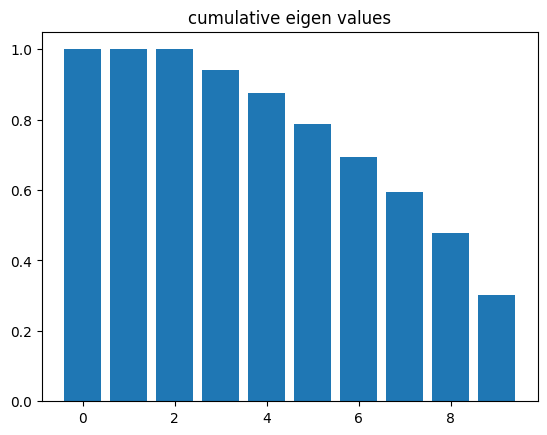

In [39]:
cumValues = np.cumsum(values)/sum(values)
x = np.arange(len(values))
plt.bar(x[::-1],cumValues)
plt.title("cumulative eigen values")

In [40]:
# considering explained variance more than equal to 75%. This will decide how many components will come into this
k = np.argmax(cumValues>= 0.75) + 1
k

5

#### The eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components.

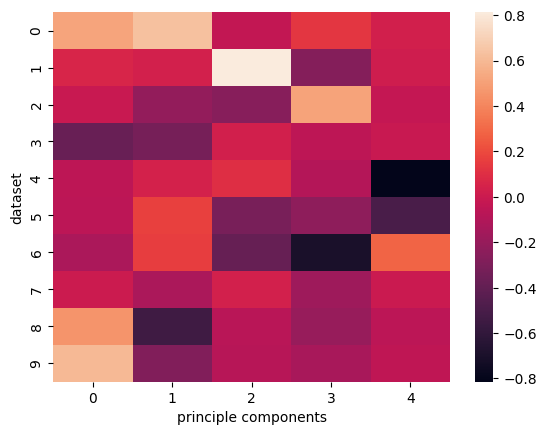

(10, 5)

In [41]:
Uk = vectors[:,:k]
sns.heatmap(Uk)
plt.xlabel("principle components")
plt.ylabel("dataset")
plt.show()
Uk.shape

#### Project the Data onto the Selected Principal Components

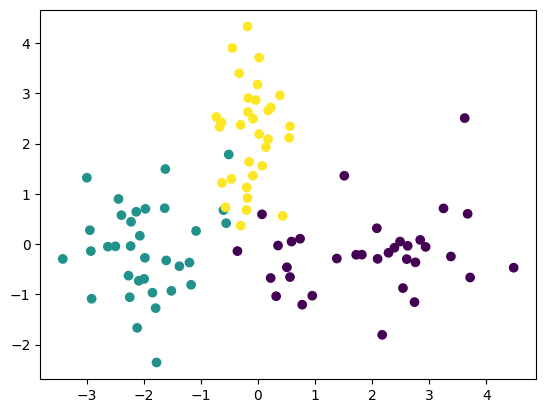

In [42]:
P = A.dot(Uk)
plt.scatter(P[:,0], P[:,1], c=y)
plt.show()